# Pymaceuticals Inc.
---

### Analysis

An analysis of squamous cell carcinoma (SCC) treatment with Pymaceuticals' drug, Capomulin, and its performance compared to other SCC drug regimens.

### Initial Preparation:

Initial preparation of this dataset revealed a duplicate Mouse ID for mouse 'g989'.  All data for this mouse was identified and removed from this study. 

### Statistical Analysis by Drug Group:

A summary statistics table was created for this dataset to better understand the performance of individual drug regimens on tumor volume.   
  
*Mean and Median*  
With both mean and median being considered as measures of central tendency, Capomulin and Ramicane regimens have the lowest mean/median tumor volumes at approximately 40mm3.  The mean/median tumor volumes of all other treatments and placebo are above 50mm3.  This initial observation indicates that Capomulin and Ramicane regimens appear to have a greater overall effect on tumour volume.  
  
*Standard Deviation*  
The regimens with the lowest tumor volume standard deviation are Capomulin and Ramicane, with standard deviations less than 5mm3.  All other regimens have standard deviations greater than 6mm3.  This shows that individual mice in the Capomulin and Ramicane regimens are closer to the mean, indicating a more consistent response to these regimens.  
  
*Standard Error*  
The regimens with the lowest tumor volume stardard error (standard error = 0.3) are Capomulin and Ramicane.  This indicates a more consistent tumor volume per sampling group in these drug regimens.  The regimens with the highest amount of tumor volume standard error (standard error = 0.6) are Ketapril, Naftisol, Placebo, and Stelasyn.  This indicates a less consistent tumor volume per sampling group in these drug regimens.  

### Understanding the Dataset

A bar chart was created to visualize how the mice in this study were distributed by drug regimen.  The number of observed timepoints was calculated by drug regimen.  The chart revealed the greatest number of timepoint observations were for Capomulin and Ramicane as compared to the rest of the dataset.  

A Pie chart was constructed to visualize how mouse 'sex' was distributed in this study.  There shows a 51%-49% (Male-Female) split within this study.

### Detection of Potential Outliers and Analysis of Regime Performance

Tumor volumes at the final collected timepoints of each mouse in the Capolumin, Ramicane, Infubinol, and Ceftamin regimens were identified.  Potential outliers of these tumor volumes were identified quantitatively via IQR calculations and visually using box plots.  The Infubinol regimen was the only regimen to have a potential outlier that is below the lower range/ box-plot whisker, with an uncharacterically low final tumor volume for Infubinol treatment. Further analysis should be conducted of this mouse to determine why it has been identified as an outlier.   
The box plots help visualize the effectiveness of Capomulin and Ramicane vs Infubinol and Ceftamin to backup the summary statistics.  Capomulin and Ramicane have smaller IQRs and are positioned lower on the plot.  This indicates a more consistent ability to reduce tumor volume as compared to Infubinol and Ceftamin.      

### Visualization of the Change in Tumor Volume (mm3) during Capomulin Treatment in Mouse l509

A line graph was constructed to visualize how tumor volume changes over time in a single mouse sample under Capomulin treatment.  Mouse 'l509' inititally showed tumor growth at the beginning of the regimen, but at approximately day 20 the tumor volume began to reduce. By day25 the tumor was smaller than the tumor volume at the beginning of the regimen.

### Correlation and Regression for Mouse Weight vs Average Tumor Volume in the Capomulin Regimen

Mouse weight was compared to average tumor volume, and visualized in a scatter plot.  Pearson correlation coefficient showed a strong positive correlation between weight and tumor volume, with a Pearson r=0.84. A regression line was added to the scatter plot to better visualize the trend.

## Final Thoughts

Capomulin appears to provide a consistent reduction of Tumor Volume for squamous cell carcinoma effected mice, as compared to many other drug regimens.  The Capomulin results are comparable to the Ramicane regimen, indicating that it is an effective alternative option for treatment of SCC. It would be helpful to further investigate mortality within drug regimens.  More timespoints were collected for the Capomulin and Ramicane regimens, and this may indicate that these regimens had an increased survival, and subsequently are able to have more timepoints collected. This would also help explain why there are greater tumor volumes for all groups compared to Capomulin and Ramicane.
Interestingly, within the Capomulin treated cohort there showed a strong positive correlation between tumor volume and mouse weight.  This suggests that weight may be a factor either in size of tumour or maximal effectiveness of Capomulin treatment.  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = study_df['Mouse ID'].nunique()
print(f' The number of unique Mouse IDs are: {num_mice}')

 The number of unique Mouse IDs are: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df[study_df[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
dup_mice_id = duplicate_mice['Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df= pd.DataFrame(study_df.loc[study_df['Mouse ID'] == "g989"])

duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df.drop(study_df[(study_df['Mouse ID'] == "g989")].index, inplace = True)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
reduced_num_mice = study_df["Mouse ID"].nunique()
print(f'After removal of duplicate Mouse ID, g989, the number of mice in this study is: {reduced_num_mice}')

After removal of duplicate Mouse ID, g989, the number of mice in this study is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group_df = study_df.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = regimen_group_df['Tumor Volume (mm3)'].mean()
tumor_median = regimen_group_df['Tumor Volume (mm3)'].median()
tumor_variance = regimen_group_df['Tumor Volume (mm3)'].var()
tumor_stddev = regimen_group_df['Tumor Volume (mm3)'].std()
tumor_sem = regimen_group_df['Tumor Volume (mm3)'].sem()
drug_summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                               "Median Tumor Volume": tumor_median,
                               "Tumor Volume Variance": tumor_variance,
                               "Tumor Volume Std. Dev.": tumor_stddev,
                               "Tumor Volume Std. Err.": tumor_sem})
drug_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

study_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

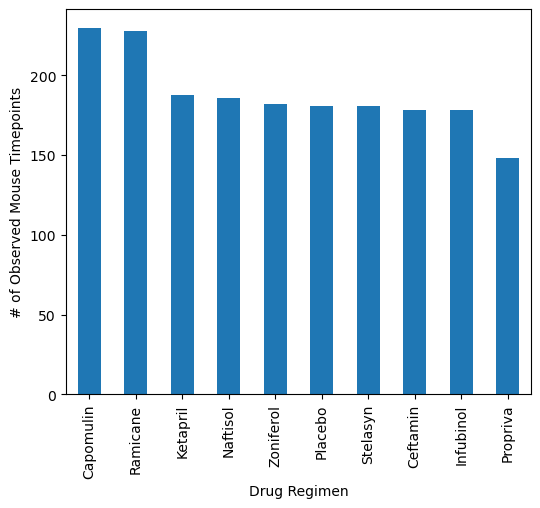

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_data = regimen_group_df['Mouse ID'].count()
sorted_pandas_bar_data = pandas_bar_data.sort_values(ascending=False)
sorted_pandas_bar_data.plot(kind='bar', xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", figsize=(6,5))

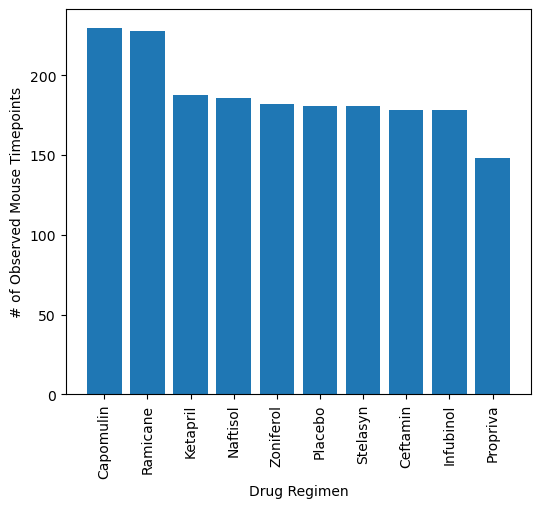

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_data = regimen_group_df['Mouse ID'].count()
sorted_pyplot_bar_data = pyplot_bar_data.sort_values(ascending=False)
plt.figure(figsize=(6,5))
plt.bar(sorted_pyplot_bar_data.index, sorted_pyplot_bar_data)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

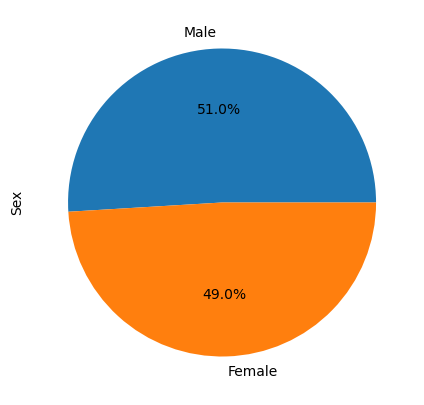

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = pd.DataFrame(study_df["Sex"].value_counts())
pie_pandas = sex_counts.plot(kind="pie", y="count", ylabel="Sex", autopct='%1.1f%%', legend=None, figsize=(6,5))

Text(0, 0.5, 'Sex')

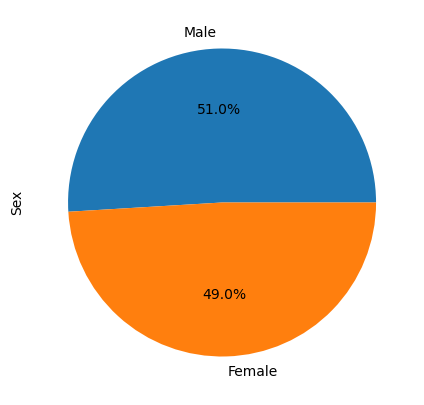

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pyplot_data = study_df["Sex"].value_counts()
plt.figure(figsize=(6,5))
plt.pie(sex_pyplot_data, labels=sex_pyplot_data.index, autopct="%1.1F%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint.reset_index(drop=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_t_vol_df = pd.merge(last_timepoint, study_df, on=["Mouse ID", "Timepoint"], how='left')
last_t_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
num_treatments = len(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# getting tumor volumes of mice on each drug
# drugs are subsetted [0-3] according to "treatments" list
for x in treatments:
    t_data = last_t_vol_df.loc[last_t_vol_df["Drug Regimen"] == x, ['Tumor Volume (mm3)']]
    tumor_vol_data.append(t_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Determine outliers using upper and lower bounds of all drugs
for med in range(num_treatments):
    drug = tumor_vol_data[med]['Tumor Volume (mm3)']
    lower = drug.quantile(0.25)
    lower_round = round(lower, 1)
    upper = drug.quantile(0.75)
    upper_round = round(upper,1)
    iqr = (upper-lower)
    outlier_occupancy = tumor_vol_data[med].loc[(tumor_vol_data[med]['Tumor Volume (mm3)'] < (lower - (1.5*iqr))) |
                                 (tumor_vol_data[med]['Tumor Volume (mm3)'] > (upper + (1.5*iqr))),:]
    print(f'{treatments[med]} has an Tumor Volume IQR between {lower_round}mm3 and {upper_round}mm3, and an outlier count of: {len(outlier_occupancy)}')
    if len(outlier_occupancy)>0:
        outliers = outlier_occupancy["Tumor Volume (mm3)"].tolist()
        print(f'   The potential outlier(s) of {treatments[med]} treatment are valued at: {outliers}')

Capomulin has an Tumor Volume IQR between 32.4mm3 and 40.2mm3, and an outlier count of: 0
Ramicane has an Tumor Volume IQR between 31.6mm3 and 40.7mm3, and an outlier count of: 0
Infubinol has an Tumor Volume IQR between 54.0mm3 and 65.5mm3, and an outlier count of: 1
   The potential outlier(s) of Infubinol treatment are valued at: [36.3213458]
Ceftamin has an Tumor Volume IQR between 48.7mm3 and 64.3mm3, and an outlier count of: 0


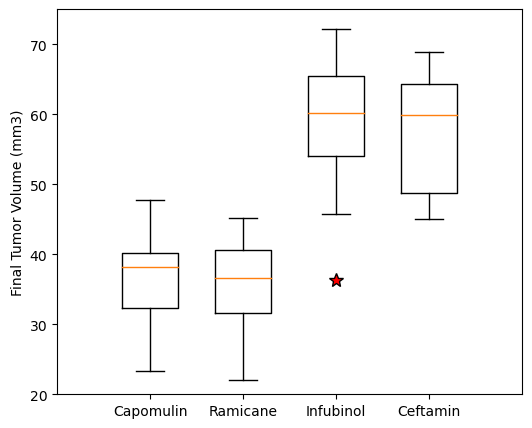

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Setting marker
flierprop = dict(marker="*", markerfacecolor="red",markersize=10)

# Using j for position on boxplots
j=1
plt.figure(figsize=(6,5))
for x in range(num_treatments):
    plt.boxplot(tumor_vol_data[x], positions=[j], widths=0.6, flierprops=flierprop)
    j=j+1
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(20, 75)
plt.xlim(0,5)

plt.show()

## Line and Scatter Plots

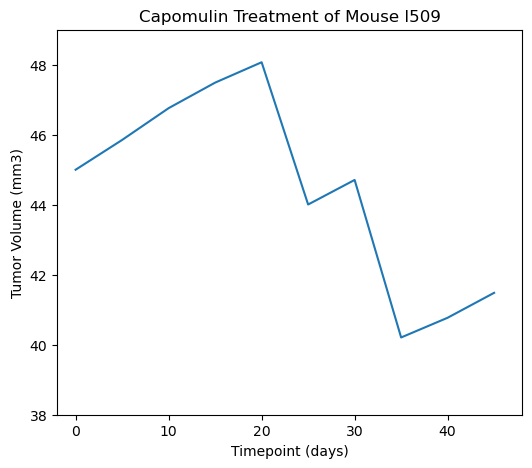

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Finding all mice under the Capomulin regimen
capomulin_mice = study_df.loc[study_df["Drug Regimen"] == "Capomulin", :]

# Isolating single mouse by ID
capomulin_mouse = capomulin_mice.loc[capomulin_mice['Mouse ID'] == "l509",:]

x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]
plt.figure(figsize=(6,5))
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.ylim(38, 49)
plt.xlim(-2,48)
plt.show()

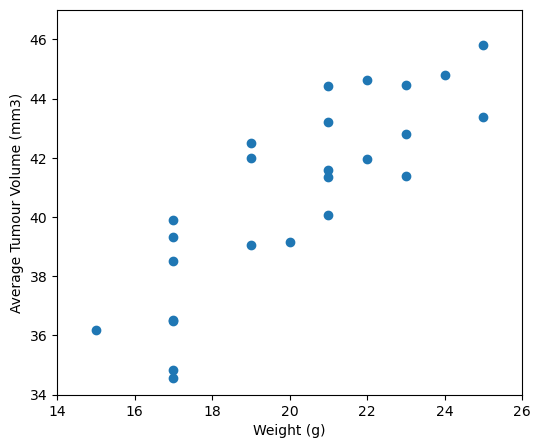

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grouped capomulin regimen mice df by Mouse ID
capomulin_grouped = capomulin_mice.groupby(['Mouse ID'])

x_axis_weight = capomulin_grouped['Weight (g)'].mean()
y_axis_avtumvol = capomulin_grouped['Tumor Volume (mm3)'].mean()
plt.figure(figsize=(6,5))
plt.scatter(x_axis_weight, y_axis_avtumvol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.ylim(34, 47)
plt.xlim(14,26)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.84.


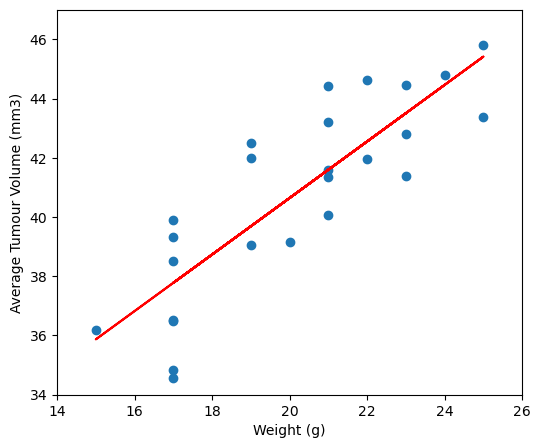

In [19]:
# Correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

x_axis_weight = capomulin_grouped['Weight (g)'].mean()
y_axis_avtumvol = capomulin_grouped['Tumor Volume (mm3)'].mean()

# Using PearsonR SciPy function and printing only correlation coefficient from result
correlation = st.pearsonr(x_axis_weight, y_axis_avtumvol)
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is {round(correlation[0],2)}.")

# Using SciPy linregress to determine regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_weight, y_axis_avtumvol)
regress_values = x_axis_weight * slope + intercept
plt.figure(figsize=(6,5))
plt.scatter(x_axis_weight, y_axis_avtumvol)
plt.plot(x_axis_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.ylim(34, 47)
plt.xlim(14,26)
plt.show()
